**Table of contents**<a id='toc0_'></a>    
- [Datasets and Dataloaders](#toc1_)    
  - [Loading a dataset](#toc1_1_)    
  - [Iterating and visualizing the Dataset](#toc1_2_)    
  - [Preparing your data for training with DataLoaders](#toc1_3_)    
  - [Iterate through the DataLoader](#toc1_4_)    
- [Normalization](#toc2_)    
  - [Transforms](#toc2_1_)    
  - [ToTensor()](#toc2_2_)    
  - [Lambda transforms](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

# <a id='toc1_'></a>[Datasets and Dataloaders](#toc0_)

- PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that enable you to use pre-loaded datasets as well as your own data.

## <a id='toc1_1_'></a>[Loading a dataset](#toc0_)

In [2]:

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [3]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [18]:
print(type(training_data))
print(training_data.__len__())
print(training_data.__str__())
print(type(training_data[10]))


<class 'torchvision.datasets.mnist.FashionMNIST'>
60000
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
<class 'tuple'>


In [16]:
training_data[10]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431,
           0.5569, 0.7843, 0.4157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.3333, 0.7255, 0.4392, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5961, 0.8392,
           0.8510, 0.7608, 0.9255, 0.8471, 0.7333, 0.5843, 0.5294, 0.6000,
           0.8275, 0.8510, 0.9059, 0.8039, 0.8510, 0.7373, 0.1333, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2588, 0.7255, 0.6510,
           0.7059, 0.7098, 0.7451, 0.8275, 0.8667, 0.7725, 0.5725, 0.7765,
           0.8078, 0.7490, 0.6588, 0.7451, 0.6745, 0.7373, 0.6863, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5294, 0.6000, 0.6275,
           0.6863, 0.7059, 0.6667, 0.7294, 0.7333, 0.7451, 0.7373, 0.7451,
           0.7333, 0.6824, 0.7647, 0.7255, 

## <a id='toc1_2_'></a>[Iterating and visualizing the Dataset](#toc0_)


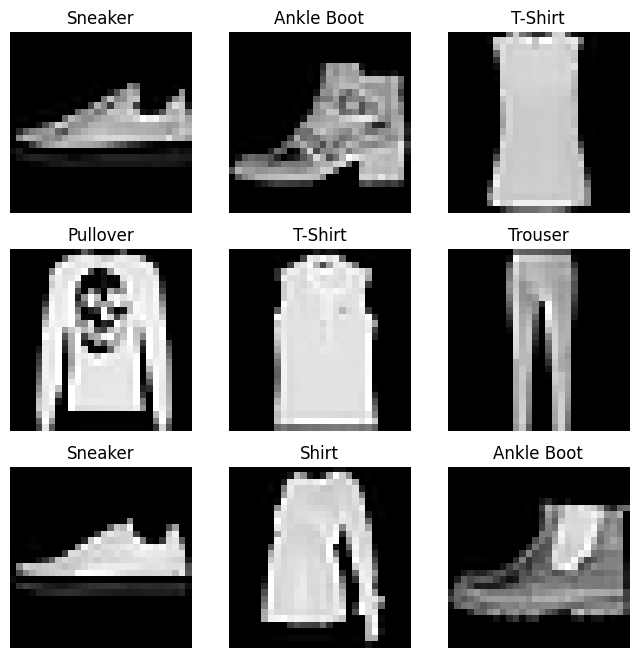

In [15]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## <a id='toc1_3_'></a>[Preparing your data for training with DataLoaders](#toc0_)

In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [20]:
train_dataloader

## <a id='toc1_4_'></a>[Iterate through the DataLoader](#toc0_)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


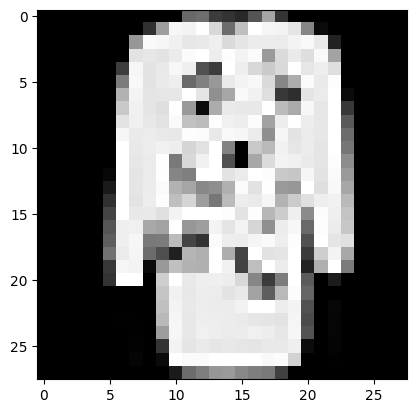

Label: Dress


In [21]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()

In [24]:
print(label)
label_name = list(labels_map.values())[label]
print(f"Label: {label_name}")

tensor(3)
Label: Dress


In [26]:
train_labels

tensor([3, 5, 3, 3, 5, 6, 4, 8, 8, 2, 1, 2, 7, 5, 2, 6, 8, 4, 2, 2, 3, 3, 0, 3,
        6, 6, 3, 4, 4, 7, 6, 9, 9, 5, 4, 4, 3, 6, 4, 8, 1, 5, 4, 3, 8, 5, 9, 2,
        1, 6, 0, 7, 6, 2, 0, 5, 2, 4, 6, 9, 0, 7, 1, 9])

In [22]:
train_features

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

# <a id='toc2_'></a>[Normalization](#toc0_)

## <a id='toc2_1_'></a>[Transforms](#toc0_)

In [31]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [34]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

## <a id='toc2_2_'></a>[ToTensor()](#toc0_)

- `ToTensor` converts a PIL image or NumPy `ndarray` into a `FloatTensor` and scales the image's pixel intensity values into the range \[0., 1.\]

## <a id='toc2_3_'></a>[Lambda transforms](#toc0_)


In [32]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [33]:
target_transform

Lambda()